In [2]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Cross-Validation and Bias-Variance decomposition
## Cross-Validation
Implementing 4-fold cross-validation below:

In [3]:
from helpers import load_data

# load dataset
x, y = load_data()

In [28]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)

In [33]:
from costs import compute_mse
from ridge_regression import ridge_regression
from build_polynomial import build_poly

def cross_validation(y, x, k_indices, k, lambda_, degree):
    """return the loss of ridge regression."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    test_x = x[k_indices[k]].flatten()
    train_x = x[np.delete(k_indices,(k),axis=0)].flatten()
    test_y = y[k_indices[k]].flatten()
    train_y = y[np.delete(k_indices,(k),axis=0)].flatten()
    # ***************************************************
    # INSERT YOUR CODE HERE
    poly_test_x = build_poly(test_x,degree)
    poly_train_x = build_poly(train_x,degree)
    # ***************************************************
    # INSERT YOUR CODE HERE
    w = ridge_regression(train_y,poly_train_x,lambda_)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate the loss for train and test data: TODO
    loss_tr = compute_mse(train_y,poly_train_x,w)
    loss_te = compute_mse(test_y,poly_test_x,w) 
    return loss_tr, loss_te


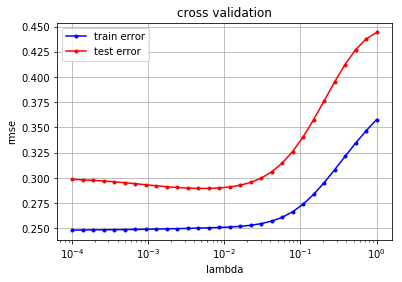

In [38]:
from plots import cross_validation_visualization

def cross_validation_demo():
    seed = 1
    degree = 7
    k_fold = 4
    lambdas = np.logspace(-4, 0, 30)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    # ***************************************************
    # INSERT YOUR CODE HERE
    for lambda_ in lambdas:
        rmse_tr_tmp = 0
        rmse_te_tmp = 0
        for k in range(k_fold):
            loss_tr, loss_te = cross_validation(y,x,k_indices,k,lambda_,degree)
            rmse_tr_i = (loss_tr*2)**0.5
            rmse_te_i = (loss_te*2)**0.5
            rmse_tr_tmp += (rmse_tr_i)
            rmse_te_tmp += (rmse_te_i)
        rmse_tr.append(rmse_tr_tmp/k_fold)
        rmse_te.append(rmse_te_tmp/k_fold) 
    # ***************************************************    
    cross_validation_visualization(lambdas, rmse_tr, rmse_te)

cross_validation_demo()

## Bias-Variance Decomposition
Visualize bias-variance trade-off by implementing the function `bias_variance_demo()` below:

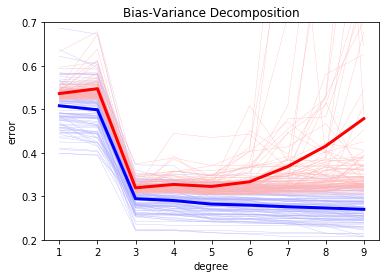

In [42]:
from least_squares import least_squares
from split_data import split_data
from plots import bias_variance_decomposition_visualization

def bias_variance_demo():
    """The entry."""
    # define parameters
    seeds = range(100)
    num_data = 10000
    ratio_train = 0.005
    degrees = range(1, 10)
    
    # define list to store the variable
    rmse_tr = np.empty((len(seeds), len(degrees)))
    rmse_te = np.empty((len(seeds), len(degrees)))
    
    for index_seed, seed in enumerate(seeds):
        np.random.seed(seed)
        x = np.linspace(0.1, 2 * np.pi, num_data)
        y = np.sin(x) + 0.3 * np.random.randn(num_data).T
        # ***************************************************
        # INSERT YOUR CODE HERE
        train_x, train_y, test_x, test_y = split_data(x,y,ratio_train,seed)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # bias_variance_decomposition: TODO
        for index_degree, degree in enumerate(degrees):
            poly_test_x = build_poly(test_x,degree)
            poly_train_x = build_poly(train_x,degree)

            w = least_squares(train_y,poly_train_x)

            loss_tr = compute_mse(train_y,poly_train_x,w)
            loss_te = compute_mse(test_y,poly_test_x,w) 

            rmse_tr[index_seed, index_degree] = (loss_tr*2)**0.5
            rmse_te[index_seed, index_degree] = (loss_te*2)**0.5

    bias_variance_decomposition_visualization(degrees, rmse_tr, rmse_te)

bias_variance_demo()